# Описание проекта
Вас пригласили на стажировку в отдел маркетинговой аналитики Яндекс.Афиши. Первое задание: помочь маркетологам снизить расходы — отказаться от невыгодных источников трафика и перераспределить бюджет.

Есть данные Яндекс.Афиши с июня 2017 по конец мая 2018 года:
* лог сервера с данными о посещениях сайта Яндекс.Афиши,
* выгрузка всех заказов за этот период,
* статистика рекламных расходов.

Вам предстоит изучить:
* как клиенты пользуются сервисом,
* когда делают первые покупки на сайте,
* сколько денег приносит компании каждый клиент,
* когда расходы на привлечение клиента окупаются.
Выручка измеряется в условных единицах — у.е.

# Описание данных
В вашем распоряжении три датасета.
Файл __*visits_log.csv*__ хранит лог сервера с информацией о посещениях сайта, __*orders_log.csv*__ — информацию о заказах, а __*costs.csv*__ — информацию о расходах на маркетинг.

Структура __*visits_log.csv*__
* Uid — уникальный идентификатор пользователя,
* Device — категория устройства пользователя,
* Start Ts — дата и время начала сессии,
* End Ts — дата и время окончания сессии,
* Source Id — идентификатор источника перехода на сайт.

Структура __*orders_log.csv*__
* Uid — уникальный идентификатор пользователя,
* Buy Ts — дата и время заказа,
* Revenue — сумма заказа.

Структура __*costs.csv*__
* source_id — идентификатор рекламного источника,
* dt — дата проведения рекламной кампании,
* costs — расходы на эту кампанию.

# Содержание

[Шаг 1. Загрузка и подготовка данных](#Шаг-1.-Загрузка-и-подготовка-данных)

[1  Выводы к первому шагу](#Выводы-к-первому-шагу)

[Шаг 2. Расчёт метрик и построение графиков](#Шаг-2.-Расчёт-метрик-и-построение-графиков)

[2  Шаг 2.1. Продуктовые метрики](#Шаг-2.1.-Продуктовые-метрики)

[3  Выводы к шагу 2.1. Продуктовые метрики](#Выводы-к-шагу-2.1.-Продуктовые-метрики)

[4  Шаг 2.2. Метрики электронной коммерции](#Шаг-2.2.-Метрики-электронной-коммерции)

[5  Выводы к шагу 2.2. Метрики электронной коммерции](#Выводы-к-шагу-2.2.-Метрики-электронной-коммерции)

[6  Шаг 2.3. Маркетинговые метрики](#Шаг-2.3.-Маркетинговые-метрики)

[7  Выводы к шагу 2.3. Маркетинговые метрики](#Выводы-к-шагу-2.3.-Маркетинговые-метрики)

[Шаг 3. Выводы и рекомендации](#Шаг-3.-Выводы-и-рекомендации)

# Шаг 1. Загрузка и подготовка данных

In [1]:
# подключаем необходимые библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
import statistics
from matplotlib import pyplot as plt

In [2]:
# открываем файлы
visits_data = pd.read_csv('/datasets/visits_log.csv')

orders_data = pd.read_csv('/datasets/orders_log.csv')

costs_data = pd.read_csv('/datasets/costs.csv')

In [3]:
visits_data

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485


In [4]:
visits_data.columns = visits_data.columns.str.lower().str.replace(' ', '_')

In [5]:
visits_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
device       359400 non-null object
end_ts       359400 non-null object
source_id    359400 non-null int64
start_ts     359400 non-null object
uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [6]:
visits_data['end_ts'] = pd.to_datetime(visits_data['end_ts'], format = '%Y-%m-%d %H:%M:%S')

visits_data['start_ts'] = pd.to_datetime(visits_data['start_ts'], format = '%Y-%m-%d %H:%M:%S')

In [7]:
orders_data

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624
50411,2018-05-31 23:50:00,5.80,11369640365507475976
50412,2018-05-31 23:54:00,0.30,1786462140797698849
50413,2018-05-31 23:56:00,3.67,3993697860786194247


In [8]:
orders_data.columns = orders_data.columns.str.lower().str.replace(' ','_')

In [9]:
orders_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
buy_ts     50415 non-null object
revenue    50415 non-null float64
uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [10]:
orders_data['buy_ts'] = pd.to_datetime(orders_data['buy_ts'], format = '%Y-%m-%d %H:%M:%S')

In [11]:
costs_data

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
...,...,...,...
2537,10,2018-05-27,9.92
2538,10,2018-05-28,21.26
2539,10,2018-05-29,11.32
2540,10,2018-05-30,33.15


In [12]:
costs_data.columns = costs_data.columns.str.lower().str.replace(' ','_')

In [13]:
costs_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [14]:
costs_data['dt'] = pd.to_datetime(costs_data['dt'], format = '%Y-%m-%d')

In [15]:
print('Число дубликатов в датасете visits_data:', visits_data.duplicated().sum())

Число дубликатов в датасете visits_data: 0


In [16]:
print('Число дубликатов в датасете orders_data:', orders_data.duplicated().sum())

Число дубликатов в датасете orders_data: 0


In [17]:
print('Число дубликатов в датасете costs_data:', costs_data.duplicated().sum())

Число дубликатов в датасете costs_data: 0


## Выводы к первому шагу

Было загружено 3 датасета (visits_log.csv, orders_log.csv, costs.csv) с данными Яндекс.Афиши. Логи сервера содержат информацию о посещениях сайта, заказах и расходах на маркетинг. Данные "чистые", без пропусков и дубликатов. Единственное - названия столбцов были приведены к нижнему решистру, а также данные содержащие дату - приведены к соответствующему типу данных.

# Шаг 2. Расчёт метрик и построение графиков

## Шаг 2.1. Продуктовые метрики

In [18]:
visits_data['session_year'] = visits_data['start_ts'].dt.year
visits_data['session_month'] = visits_data['start_ts'].dt.month
visits_data['session_week'] = visits_data['start_ts'].dt.week
visits_data['session_data'] = visits_data['start_ts'].dt.date

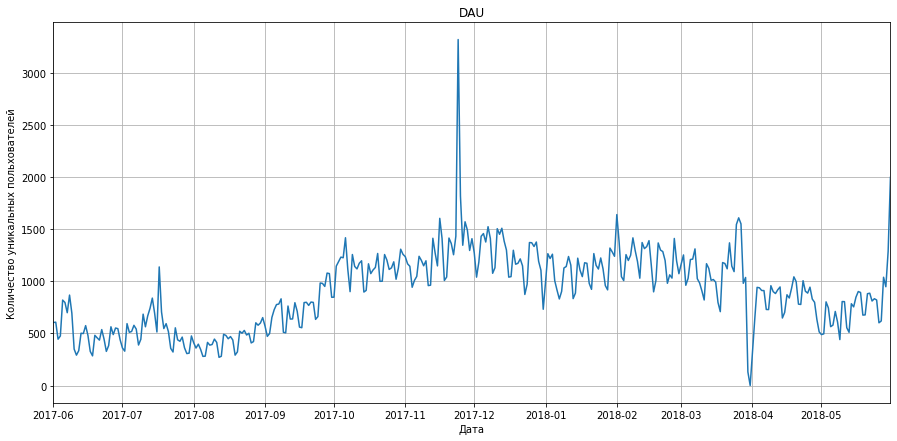

In [19]:
# расчёт DAU, WAU, MAU
dau_total = visits_data.groupby('session_data').agg({'uid' : 'nunique'}).plot(grid = True, figsize=(15, 7), legend = False)
plt.title('DAU')
plt.xlabel('Дата')
plt.ylabel('Количество уникальных польхователей')
plt.show()

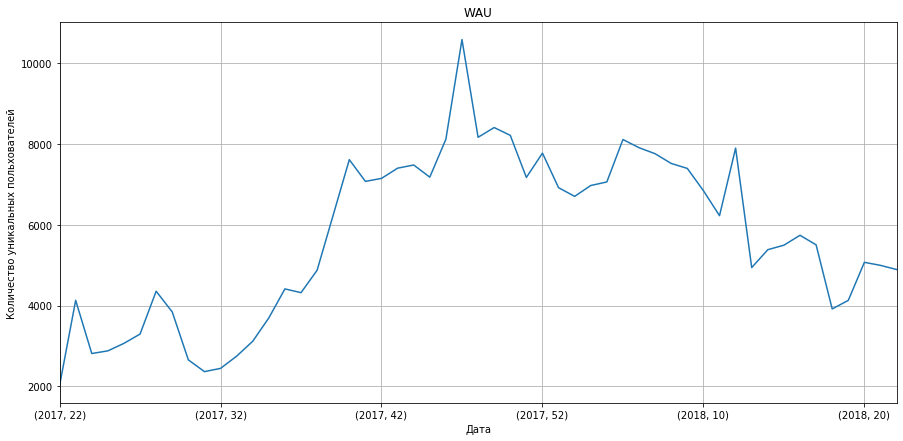

In [20]:
wau_total = visits_data.groupby(['session_year', 'session_week']).agg({'uid' : 'nunique'}).plot(grid = True, figsize=(15, 7), legend = False)
plt.title('WAU')
plt.xlabel('Дата')
plt.ylabel('Количество уникальных польхователей')
plt.show()

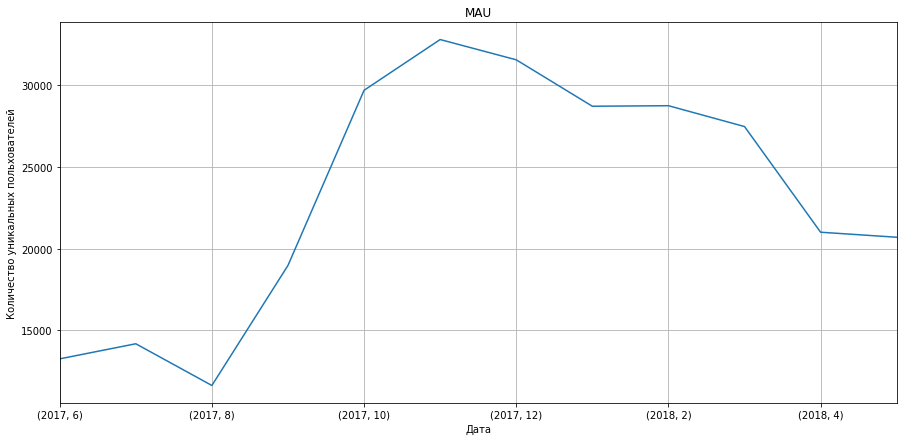

In [21]:
mau_total = visits_data.groupby(['session_year', 'session_month']).agg({'uid' : 'nunique'}).plot(grid = True, figsize=(15, 7), legend = False)
plt.title('MAU')
plt.xlabel('Дата')
plt.ylabel('Количество уникальных польхователей')
plt.show()

Исходя из графиков видно, что наибольшая активность сайта приходится на конец ноября 2017 года. Также видно что в конце марта 2018 года посещений не было, скорее всего сайт был недоступен в этот момент. Также могу предположить о сезонность, т. е. сайт пользуется большей популярностью в холодное время, тогда как летом визитов меньше.

In [22]:
dau_total = visits_data.groupby('session_data').agg({'uid' : 'nunique'}).mean()
wau_total = visits_data.groupby(['session_year', 'session_week']).agg({'uid' : 'nunique'}).mean()
mau_total = visits_data.groupby(['session_year', 'session_month']).agg({'uid' : 'nunique'}).mean()

print('Среднее значение DAU: {:.2f}'.format(dau_total['uid']))
print('Среднее значение WAU: {:.2f}'.format(wau_total['uid']))
print('Среднее значение MAU: {:.2f}'.format(mau_total['uid']))

Среднее значение DAU: 907.99
Среднее значение WAU: 5716.25
Среднее значение MAU: 23228.42


In [23]:
# количество ссессий
session_per_user = visits_data.groupby(['session_year', 'session_data']).agg({'uid' : ['count', 'nunique']})
session_per_user.columns = ['n_session', 'n_users']
session_per_user['session_per_user'] = session_per_user['n_session'] / session_per_user['n_users']

print('Среднее количество сессий на одного пользователя в день: {:.2f}'.format(session_per_user['session_per_user'].mean()))

Среднее количество сессий на одного пользователя в день: 1.08


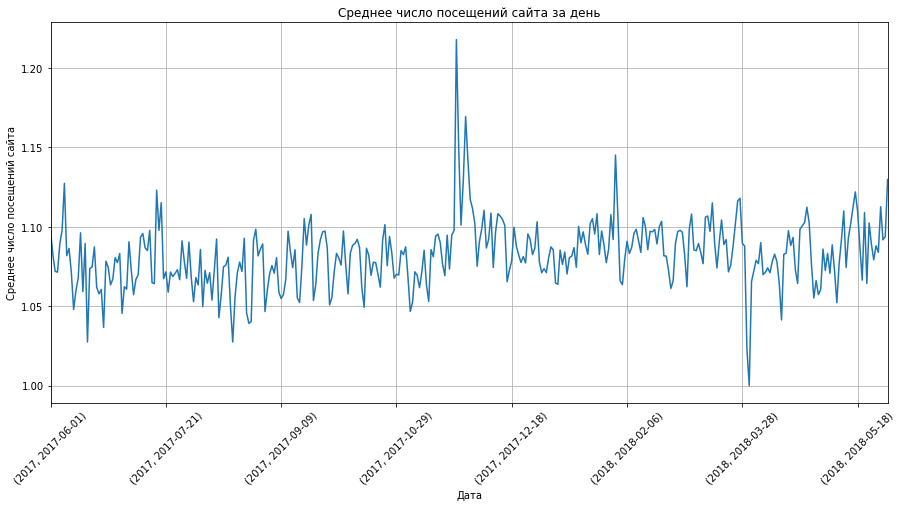

In [24]:
session_per_user.plot(y = 'session_per_user', grid = True, legend = False, figsize=(15, 7))
plt.xticks(rotation = 45)
plt.title('Среднее число посещений сайта за день')
plt.xlabel('Дата')
plt.ylabel('Среднее число посещений сайта')
plt.show()

Как видно из графика и расчётов cреднее количество сессий: 1.08, т. е. в основном на пользователя приходится одна сессия, что вполне логично. Опять же виден всплекс в поябре и падение в марте, как и на прошлом графике.

In [25]:
# средняя продолжительность сессии (ASL)

visits_data['session_duration_sec'] = (visits_data['end_ts'] - visits_data['start_ts']).dt.seconds

print('Средняя продолжительность сессии:', statistics.mode(visits_data['session_duration_sec']))

Средняя продолжительность сессии: 60


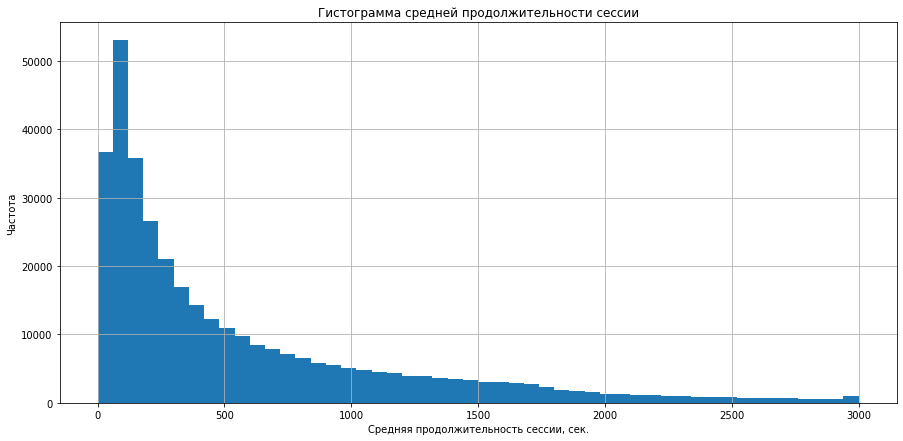

In [26]:
plt.figure(figsize=(15,7))
visits_data['session_duration_sec'].hist(bins = 50, range = (0, 3000))
plt.title('Гистограмма средней продолжительности сессии')
plt.xlabel('Средняя продолжительность сессии, сек.')
plt.ylabel('Частота')
plt.show()

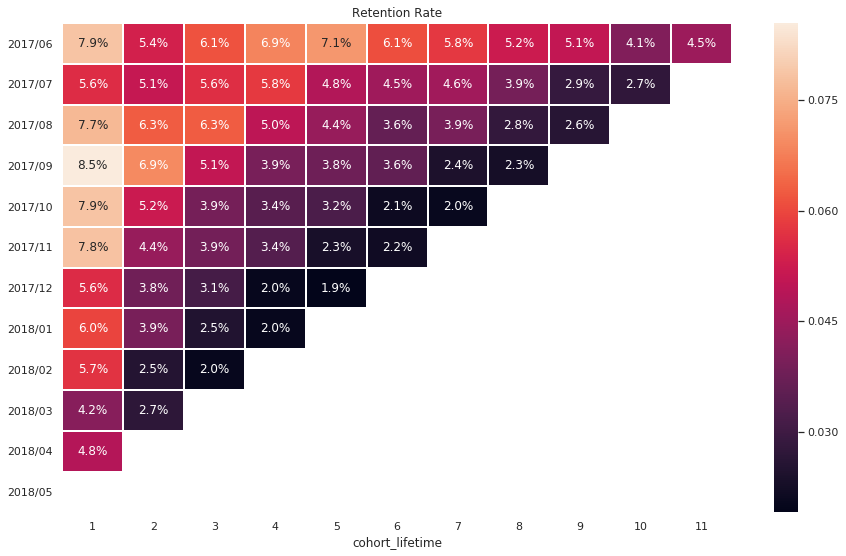

In [27]:
# рассчитайте Retention Rate - показатель, отражающий сколько пользователей из когорты относительно их изначального числа,
# вернулось в последующие переоды

# выделим дату, когда пользователь первый раз проявил активность и добавим в исходный датафрейм
first_activity_date = visits_data.groupby(['uid'])['start_ts'].min()
first_activity_date.name = 'first_activity_date'
visits_data = visits_data.join(first_activity_date, on = 'uid')

# выделим месяц активации и месяц сессии
visits_data['first_activity_month'] = visits_data['first_activity_date'].astype('datetime64[M]')
visits_data['activity_month'] = visits_data['start_ts'].astype('datetime64[M]')

# рассчитаем для каждой строки lifetime
visits_data['cohort_lifetime'] = visits_data['activity_month'] - visits_data['first_activity_month']
visits_data['cohort_lifetime'] = visits_data['cohort_lifetime'] / np.timedelta64(1, 'M')
visits_data['cohort_lifetime'] = round(visits_data['cohort_lifetime']).astype('int')

# рассчитаем колличество активных польтзователей для каждой когорты
cohorts = visits_data.groupby(['first_activity_month','cohort_lifetime']).agg({'uid':'nunique'}).reset_index()

# найдём исходное число пользователей
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_activity_month', 'uid']]
initial_users_count = initial_users_count.rename(columns = {'uid' : 'cohort_users'})

# объеденим данные о числе пользователей и данные о когорте
cohorts = cohorts.merge(initial_users_count, on = 'first_activity_month')

# рассчитаем Retention Rate
cohorts['retention'] = cohorts['uid'] / cohorts['cohort_users']

# построим тепловую карту
retention_pivot = cohorts.pivot_table(
    index='first_activity_month', columns='cohort_lifetime', 
    values='retention', aggfunc='sum',
    )
retention_pivot.index = retention_pivot.index.strftime("%Y/%m")

sns.set(style = 'white')
plt.figure(figsize = (15, 9))
plt.title('Retention Rate')

sns.heatmap(retention_pivot.iloc[:, 1:], annot = True, fmt = '.1%', linewidths = 1)

Показатели Retention Rate в целом не высокие, т. к. сайт не рассчитан на частое появление пользователей. В целом явного роста и падения Retention Rate также не наблюдается.

In [28]:
# средний Retention Rate на второй месяц жизни
print('Средний Retention Rate на второй месяц жизни: {:.2%}'.format( 
      cohorts[cohorts['first_activity_month'] == '2017-07-01']['retention'].mean()))

Средний Retention Rate на второй месяц жизни: 13.24%


## Выводы к шагу 2.1. Продуктовые метрики

Исходя из графиков DAU, WAU, MAU видно, что наибольшая активность сайта приходится на конец ноября 2017 года. Также видно что в конце марта 2018 года посещений не было, скорее всего сайт был недоступен в этот момент. Также могу предположить о сезонность, т. е. сайт пользуется большей популярностью в холодное время, тогда как летом визитов меньше.

* Среднее значение DAU: 907.99
* Среднее значение WAU: 5716.25
* Среднее значение MAU: 23228.42

Среднее количество сессий: 1.08

Как видно из графика среднего числа посещений сайта за день и расчётов cреднее количество сессий: 1.08, т. е. в основном на пользователя приходится одна сессия, что вполне логично. Опять же виден всплекс в поябре и падение в марте, как и на прошлом графике.

Средняя продолжительность сессии: 60 сек.

Показатели Retention Rate в целом не высокие, т. к. сайт не рассчитан на частое появление пользователей. В целом явного роста и падения Retention Rate также не наблюдается.

Средний Retention Rate на второй месяц жизни: 13.24%

## Шаг 2.2. Метрики электронной коммерции

In [29]:
# расчёт среднего времени с момент посещения сайта до совершения покупки
first_orders =  orders_data.groupby('uid')['buy_ts'].min()
first_orders.columns = ['uid', 'first_orders_date']

orders_period = pd.merge(visits_data, first_orders, on = 'uid')
orders_period['period'] = orders_period['buy_ts'] - orders_period['first_activity_date']

print('В среднем с момента первого посещения сайта до совершения покупки проходит: {} дней'.format(statistics.mode(orders_period['period'].dt.days)))

В среднем с момента первого посещения сайта до совершения покупки проходит: 0 дней


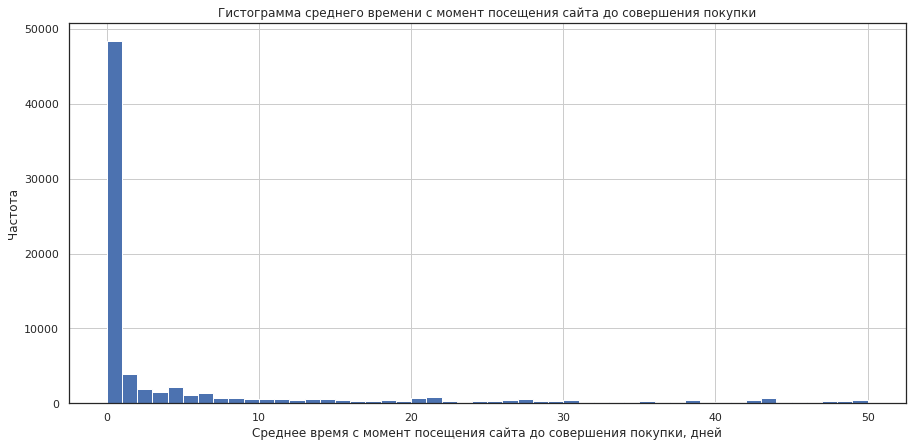

In [30]:
plt.figure(figsize=(15,7))
orders_period['period'].dt.days.hist(bins = 50, range = (0, 50))
plt.title('Гистограмма среднего времени с момент посещения сайта до совершения покупки')
plt.xlabel('Среднее время с момент посещения сайта до совершения покупки, дней')
plt.ylabel('Частота')
plt.show()

In [31]:
# среднее количество покупок на одного покупателя
purchases =  orders_period.groupby('uid')['buy_ts'].count()
purchases.columns = ['uid', 'purchases_count']

purchases_count = pd.merge(orders_period, purchases, on = 'uid')
purchases_count.columns = purchases_count.columns.str.replace('buy_ts_x','buy_ts')
purchases_count.columns = purchases_count.columns.str.replace('buy_ts_y','purchases_count')

purchases_count = purchases_count.query('(session_month >= 6) & (session_month < 11)')

In [32]:
# найдём месяц первой покупки
orders_data['order_month'] = orders_data['buy_ts'].astype('datetime64[M]')
first_orders = orders_data.groupby('uid').agg({'order_month' : 'min'}).reset_index()
first_orders.columns = ['uid', 'first_orders_month']

orders_first = pd.merge(orders_data, first_orders, on = 'uid')

orders_count = orders_first.groupby(['first_orders_month' ,'order_month', 'uid']).agg({'revenue' : 'sum', 'buy_ts' : 'count'}).reset_index()
orders_count.columns = ['first_orders_month', 'order_month', 'uid', 'revenue_sum', 'number_orders'] 

orders_count['cohort_lifetime'] = orders_count['order_month'] - orders_count['first_orders_month']
orders_count['cohort_lifetime'] = orders_count['cohort_lifetime'] / np.timedelta64(1, 'M')
orders_count['cohort_lifetime'] = round(orders_count['cohort_lifetime']).astype('int')

# рассчитаем колличество  польтзователей для каждой когорты
cohorts_orders = orders_first.groupby('first_orders_month').agg({'uid':'nunique'}).reset_index()

orders_count = orders_count.merge(cohorts_orders, on = 'first_orders_month')
orders_count.columns = orders_count.columns.str.replace('uid_x','uid')
orders_count.columns = orders_count.columns.str.replace('uid_y','cohort_size')

orders_cohorts_pivot = orders_count.pivot_table(index='first_orders_month', columns='cohort_lifetime', 
                                                values='number_orders', aggfunc='sum')

for i in range(12):
    orders_cohorts_pivot[i] = orders_cohorts_pivot[i] / cohorts_orders['uid'][i]

orders_cohorts_pivot.index = orders_cohorts_pivot.index.strftime("%Y/%m")

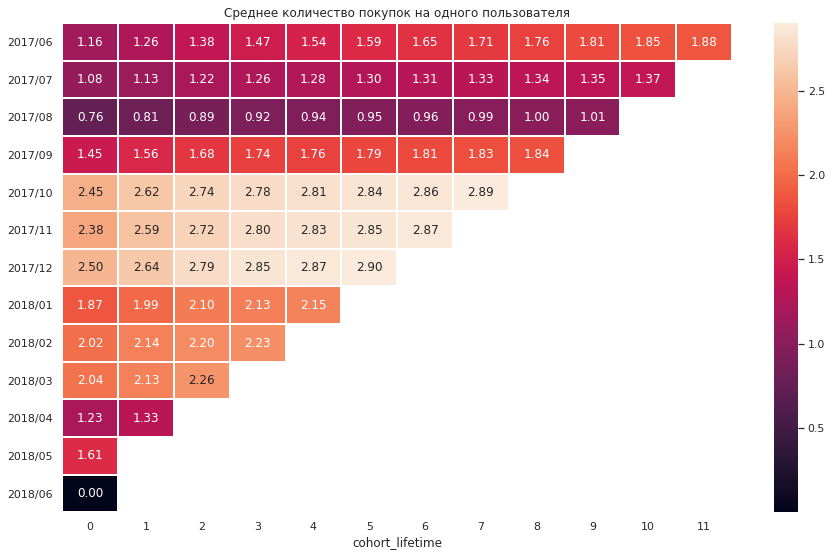

In [33]:
sns.set(style = 'white')
plt.figure(figsize = (15, 9))
plt.title('Среднее количество покупок на одного пользователя')

sns.heatmap(orders_cohorts_pivot.cumsum(axis=1), annot = True, fmt = '.2f', linewidths = 1)

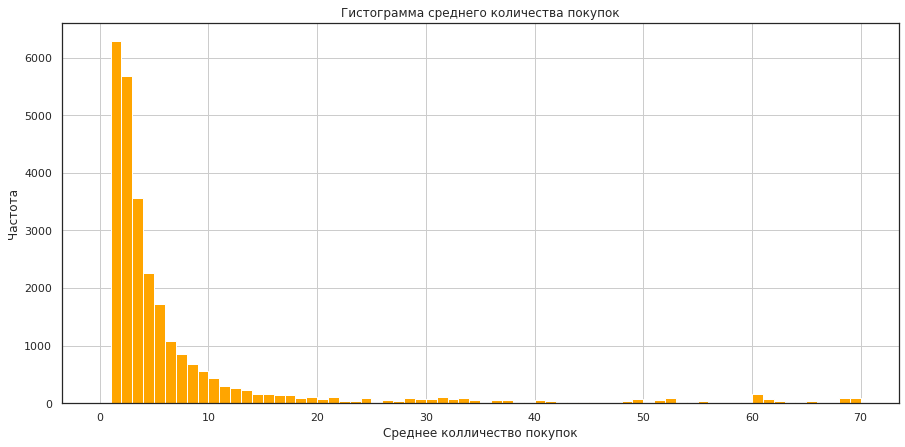

In [34]:
plt.figure(figsize=(15,7))
purchases_count['purchases_count'].hist(bins = 70, range = (0, 70), color = '#ffa500')
plt.title('Гистограмма среднего количества покупок')
plt.xlabel('Среднее колличество покупок')
plt.ylabel('Частота')
plt.show()

In [35]:
# рассчёт среднего чека
print('Средний чек: {:.2f} у.е.'.format(orders_data['revenue'].mean()))

Средний чек: 5.00 у.е.


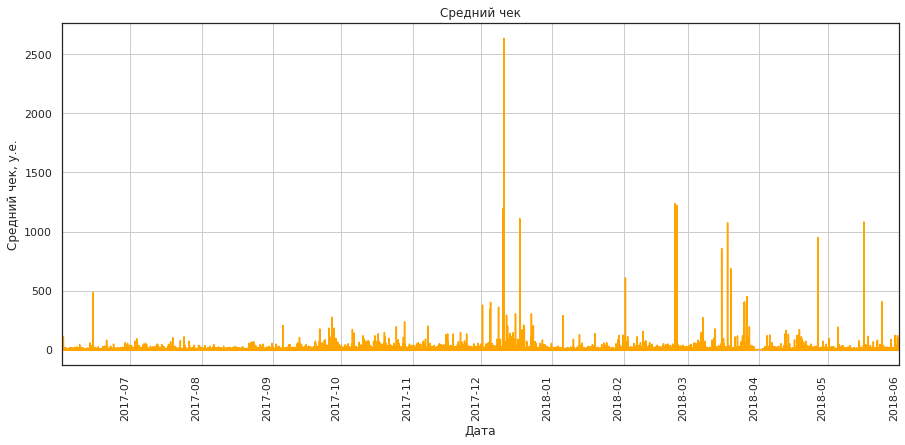

In [36]:
orders_data.groupby('buy_ts').agg({'revenue' : 'mean'}).plot(grid = True, legend = False, figsize=(15, 7), color = '#ffa500')
plt.xticks(rotation = 90)
plt.title('Средний чек')
plt.xlabel('Дата')
plt.ylabel('Средний чек, у.е.')
plt.show()

Судя по графику можно сделать вывод о распределении среднего чека в зависимости от даты. Предположу, что всплеки связаны с праздниками, например в декабре перед Новым Годом, а также в феврале перед 14 февраля и 8-м марта.

In [37]:
# расчёт LTV

margin_rate = 1

# найдём месяц первой покупки
orders_data['order_month'] = orders_data['buy_ts'].astype('datetime64[M]')
first_orders = orders_data.groupby('uid').agg({'order_month' : 'min'}).reset_index()
first_orders.columns = ['uid', 'first_orders_month']

# определим колличество новых покупателей
cohort_sizes = first_orders.groupby('first_orders_month').agg({'uid' : 'nunique'}).reset_index()
cohort_sizes.columns = ['first_orders_month', 'n_buyers']

# построим когорты
orders_new = pd.merge(orders_data, first_orders, on = 'uid')
cohorts_LTV = orders_new.groupby(['first_orders_month', 'order_month']).agg({'revenue' : 'sum'}).reset_index()

# добавим данные о количестве людей, совершивших покупку
# а также вычислим валовую прибыль и возраст когорты
report = pd.merge(cohort_sizes, cohorts_LTV, on = 'first_orders_month')
report['gp'] = report['revenue'] * margin_rate
report['age'] = (report['order_month'] - report['first_orders_month']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')

report['ltv'] = report['gp'] / report['n_buyers']

output_LTV = report.pivot_table(index = 'first_orders_month', columns = 'age', values = 'ltv', aggfunc = 'mean')

output_LTV.index = output_LTV.index.strftime("%Y/%m")

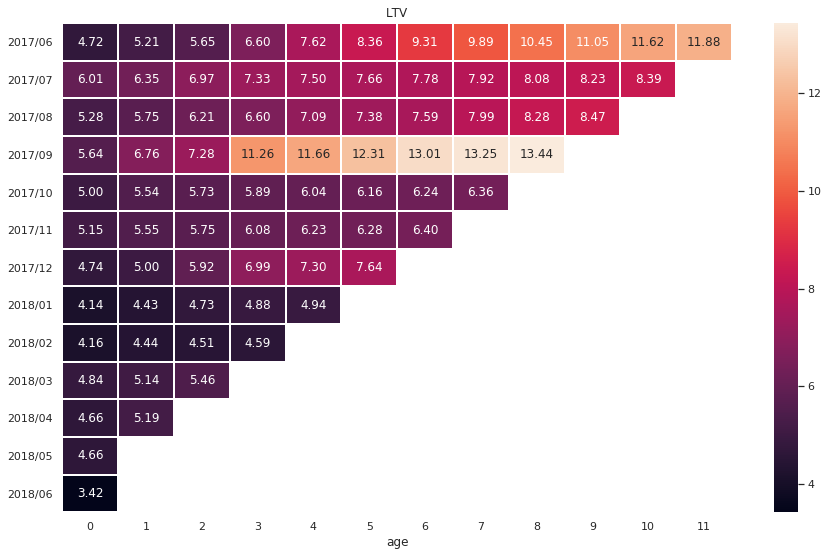

In [38]:
sns.set(style = 'white')
plt.figure(figsize = (15, 9))
plt.title('LTV')
sns.heatmap(output_LTV.cumsum(axis=1), annot = True, fmt = '.2f', linewidths = 1)

Суде по тепловой карте LTV невысокий, т. е. один клиент, в среднем приносит мало денег.

In [39]:
ltv_m6 = output_LTV.cumsum(axis = 1).mean(axis = 0)[5]

print('Средний LTV за 6 месяцев: {:.2f}'.format(ltv_m6))

Средний LTV за 6 месяцев: 7.97


## Выводы к шагу 2.2. Метрики электронной коммерции

В среднем с момента первого посещения сайта до совершения покупки проходит: 0 дней

Среднее колличество покупок за 6 месяев на одного пользователя: 3.00

Средний чек: 5.00 у.е.

Судя по графику о среднем чеке можно сделать вывод о распределении среднего чека в зависимости от даты. Предположу, что всплеки связаны с праздниками, например в декабре перед Новым Годом, а также в феврале перед 14 февраля и 8-м марта.

Суде по тепловой карте LTV невысокий, т. е. один клиент, в среднем приносит мало денег.

Средний LTV за 6 месяцев: 7.97

## Шаг 2.3. Маркетинговые метрики

In [40]:
# расчёт общей суммы расходов на маркетинг

print('Всего потрачено на маркетинг:', costs_data['costs'].sum(), 'у.е.')

Всего потрачено на маркетинг: 329131.62 у.е.


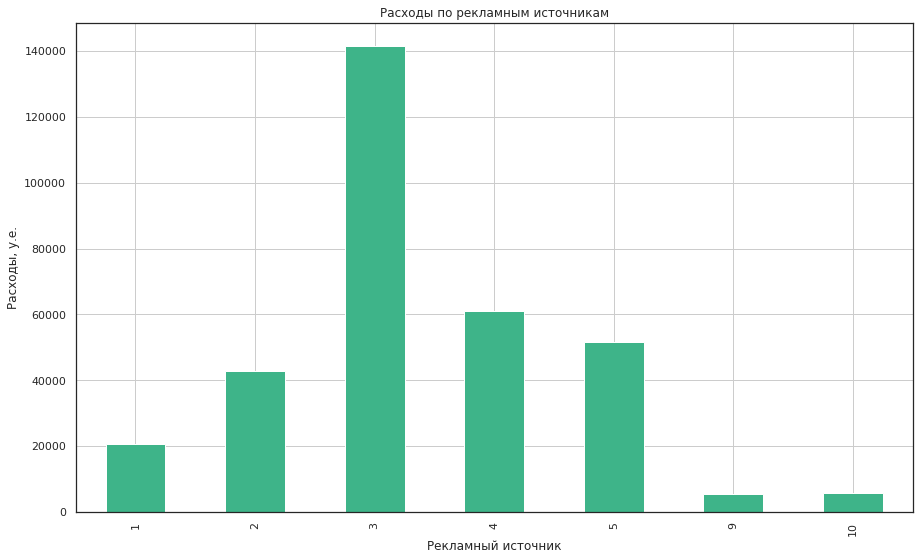

In [41]:
costs_data.groupby('source_id').agg({'costs' : 'sum'}).plot(kind = 'bar', color = '#3EB489', grid = True, legend = False, figsize = (15, 9))
plt.title('Расходы по рекламным источникам')
plt.xlabel('Рекламный источник')
plt.ylabel('Расходы, у.е.')
plt.show()

Судя по графику расходов на 6, 7 и 8 источников вообще не было, можно предположить что это были бесплатные источники. Самым "дорогим", т. е. тем, на который потрачено больше всего денег - является 3 источник, самыми лешёвыми (не считая бесплатных) являются источники 9 и 10.

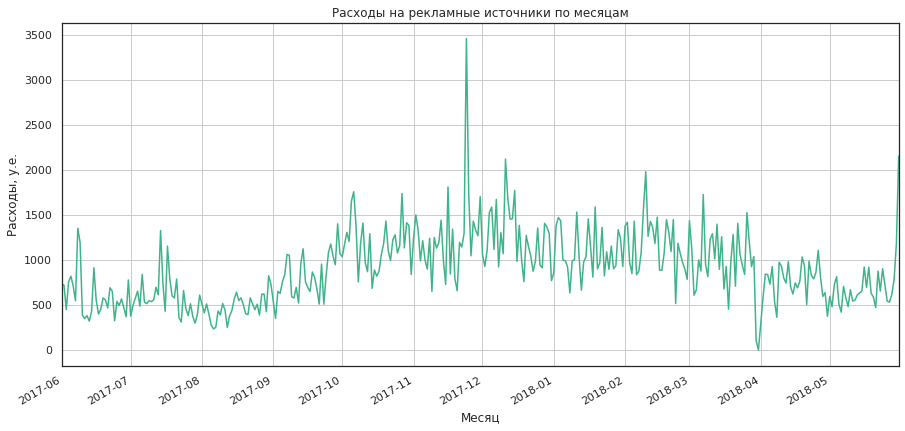

In [42]:
costs_data.groupby('dt').agg({'costs' : 'sum'}).plot(color = '#3EB489', grid = True, legend = False, figsize=(15, 7))
plt.title('Расходы на рекламные источники по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Расходы, у.е.')
plt.show()

Судя по графику, наибольшие вложения в маркетинг были в конце ноября, как раз перед новогодними праздниками. Меньше всего вложений в "тёплое" время года, как я понимаю - это не сезон для данного бизнеса, поэтому и особо не вкладывались.

In [43]:
# расчёт среднего CAC на покупателя

In [44]:
costs_data['month'] = costs_data['dt'].astype('datetime64[M]')

# найдём рассходы за месяц
mothly_costs = costs_data.groupby(['month']).sum()

report_new = pd.merge(report, mothly_costs, left_on = 'first_orders_month', right_on = 'month')

report_new['cac'] = report_new['costs'] / report_new['n_buyers']

output_CAC_users = report_new.pivot_table(index = 'first_orders_month', columns = 'age', values = 'cac', aggfunc = 'mean')

print('Средний CAC: {:.2f}'.format(output_CAC_users.mean().mean()))

Средний CAC: 9.33


Если я всё правильно понял, CAC выше LTV, т. е. привлечение одного клиента обходится дорого, на данный момент бизнес убыточный.

In [45]:
# найдём первый источник для пользователей
uid_and_source_id = visits_data.sort_values(by = 'start_ts').groupby('uid').agg({'source_id' : 'first'}).reset_index()
uid_and_source_id.columns = ['uid', 'first_source']

# получим данную связку: user_id - first_order_month - first_source
uid_first_month_source = pd.merge(first_orders, uid_and_source_id, on = 'uid')

# получим данную связку: costs_month - source_id - costs
costs_data['costs_month'] = costs_data['dt'].astype('datetime64[M]')
mothly_costs = costs_data.groupby(['costs_month', 'source_id']).agg({'costs' : 'sum'}).reset_index()

# группируем по месяцу + источнику и считаешь колличество
uid_first = uid_first_month_source.groupby(['first_orders_month', 'first_source']).agg({'uid' : 'nunique'}).reset_index()

# объединяем полученные таблицы
CAC_source = pd.merge(uid_first, mothly_costs, left_on = ['first_orders_month', 'first_source'], right_on = ['costs_month', 'source_id'])

# вычисляем САС
CAC_source['cac'] = CAC_source['costs'] / CAC_source['uid']

output_CAC = CAC_source.pivot_table(index = 'first_orders_month', columns = 'source_id', values = 'cac', aggfunc = 'mean')

output_CAC.index = output_CAC.index.strftime("%Y/%m")

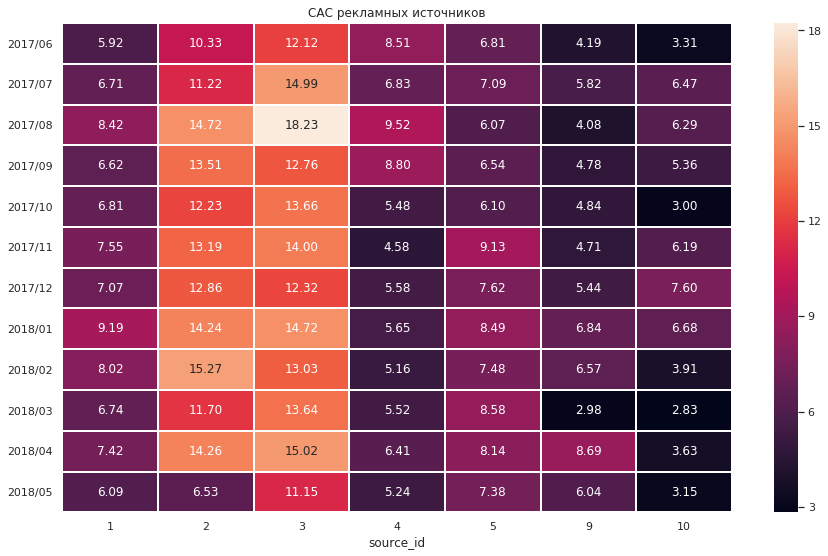

In [46]:
sns.set(style = 'white')
plt.figure(figsize = (15, 9))
plt.title('CAC рекламных источников')
sns.heatmap(output_CAC, annot = True, fmt = '.2f', linewidths = 1)

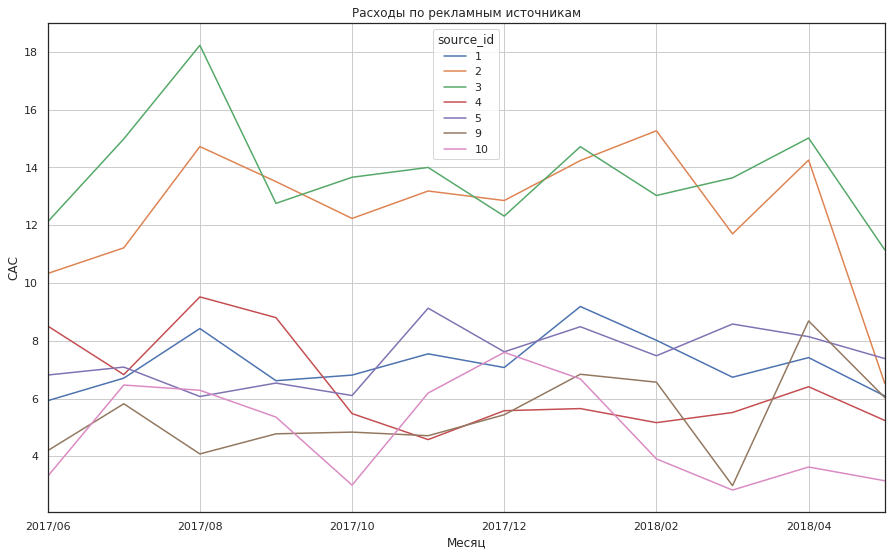

In [47]:
output_CAC.plot(grid = True, figsize = (15, 9))
plt.title('Расходы по рекламным источникам')
plt.xlabel('Месяц')
plt.ylabel('САС')
plt.show()

Судя по графику, видно, что большая цена привлечения клиентов у 3-его источника, 9 и 10 - наоборот стоимость привлечения клиента маленькая, что соответствует графику расходов на рекламный источник.

In [48]:
# добавим данные о первом источнике и первом заказе
orders_data = pd.merge(orders_data, uid_and_source_id, on = 'uid')
orders_data = pd.merge(orders_data, first_orders, on = 'uid')

# найдём  число покупателей
orders_data_first = orders_data.groupby(['first_orders_month', 'first_source']).agg({'uid' : 'nunique'})
orders_data_first.columns = ['uid_count']

# возраст
orders_data['age'] = (orders_data['order_month'] - orders_data['first_orders_month']) / np.timedelta64(1, 'M')
orders_data['age'] = orders_data['age'].round().astype('int')

# посчитаем доход
orders_data_revenue = orders_data.groupby(['first_orders_month', 'order_month', 'first_source']).agg({'revenue' : 'sum'})
orders_data_revenue.columns = ['revenue_sum']

orders_data_rez = pd.merge(orders_data_first, orders_data_revenue, on = ['first_orders_month', 'first_source'])
orders_data_rez = pd.merge(orders_data_rez, orders_data, on = ['first_orders_month', 'first_source'])

orders_data_rez['LTV'] = orders_data_rez['revenue_sum'] / orders_data_rez['uid_count']

costs_data_sum = costs_data.groupby(['source_id', 'month']).agg({'costs' : 'sum'})
costs_data_sum.columns = ['costs_sum']

rezult_ROMI = pd.merge(orders_data_rez, costs_data, left_on = ['first_source', 'first_orders_month'], right_on = ['source_id', 'month'])

rezult_ROMI['CAC'] = rezult_ROMI['costs'] / rezult_ROMI['uid_count']
rezult_ROMI['ROMI'] = rezult_ROMI['LTV'] / rezult_ROMI['CAC']

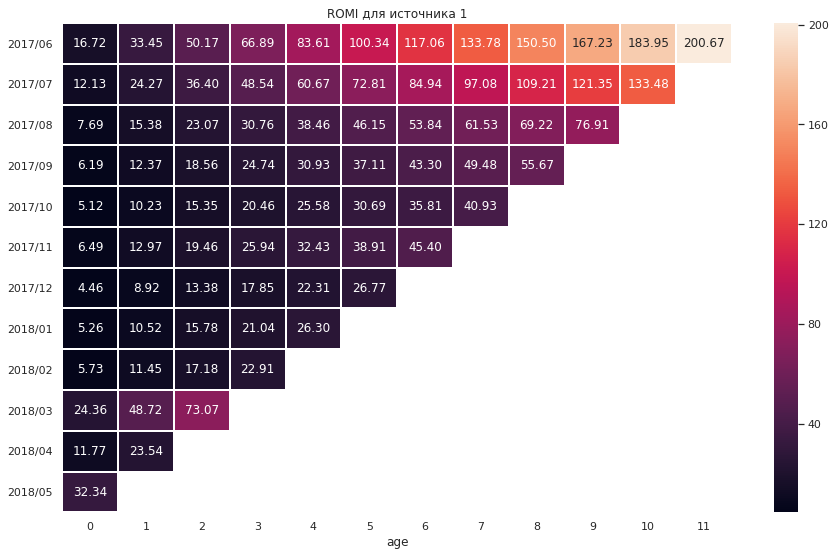

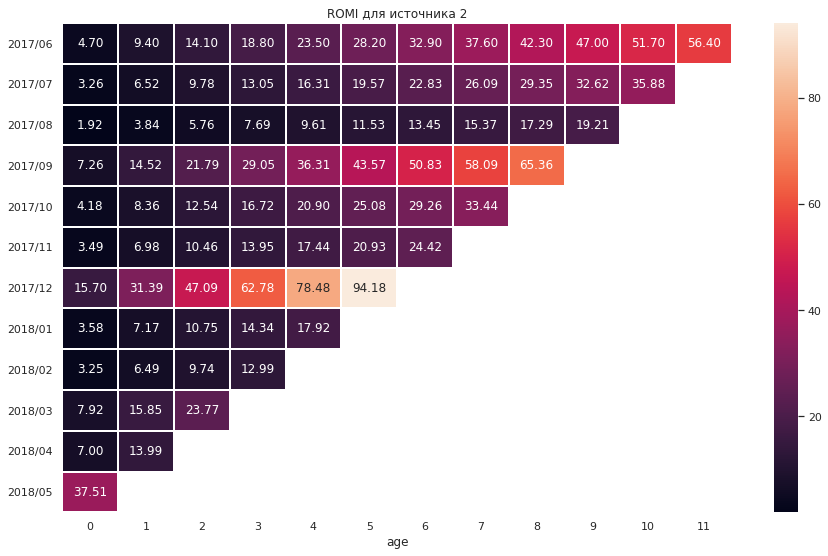

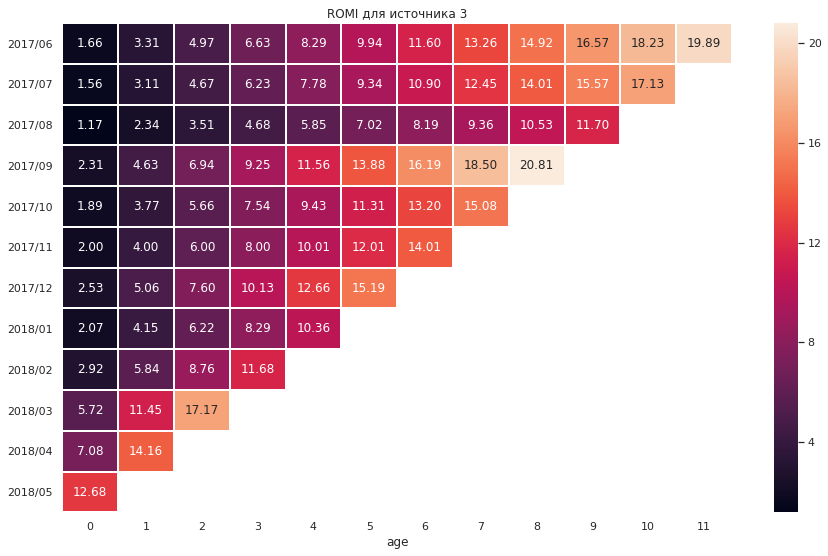

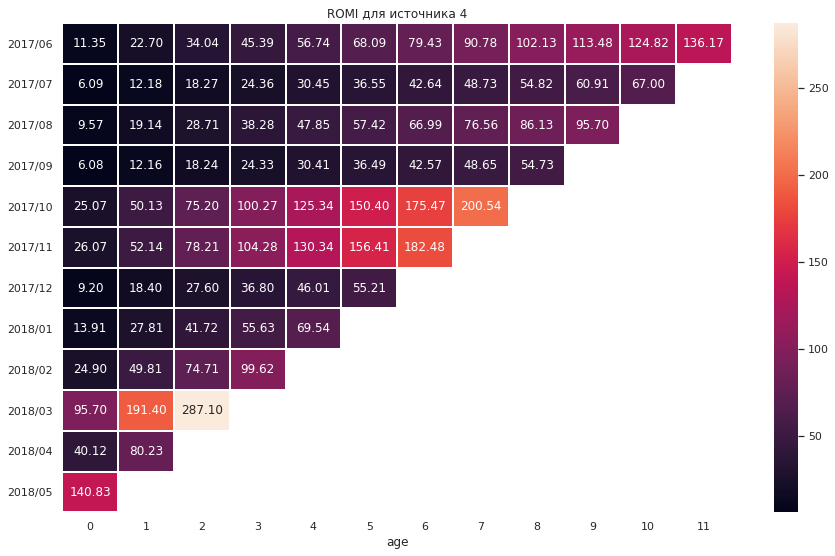

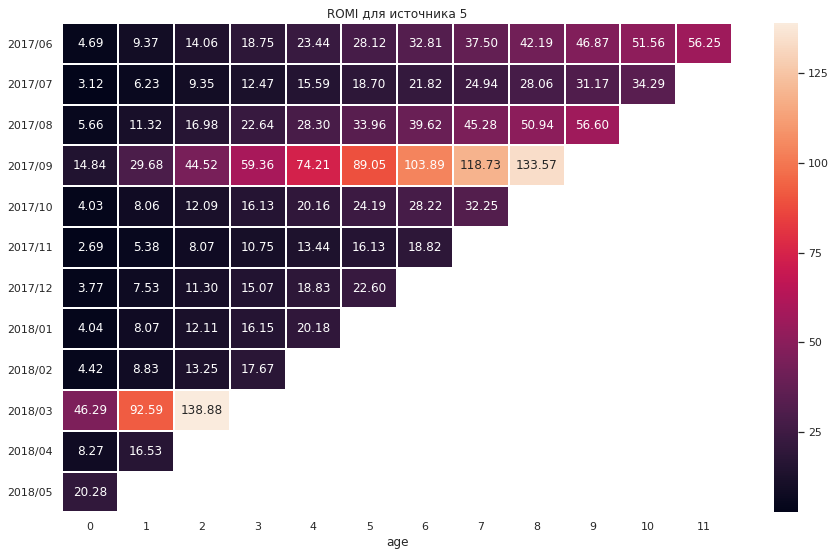

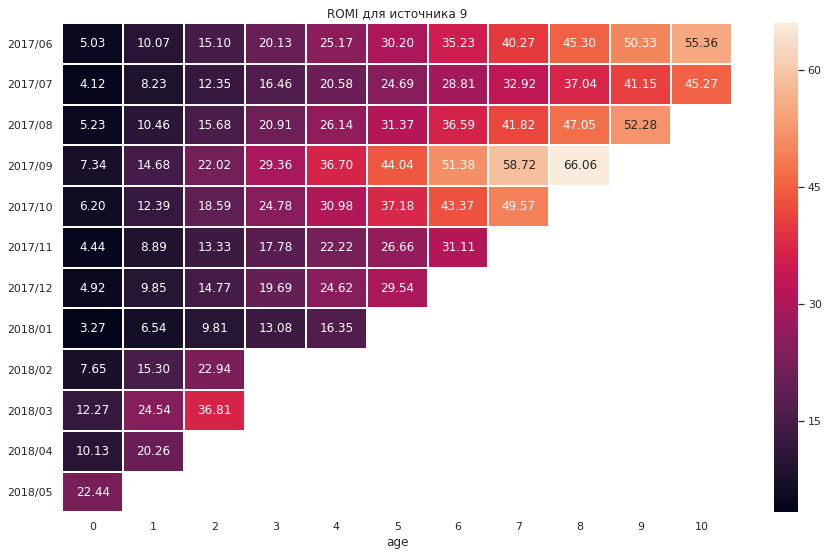

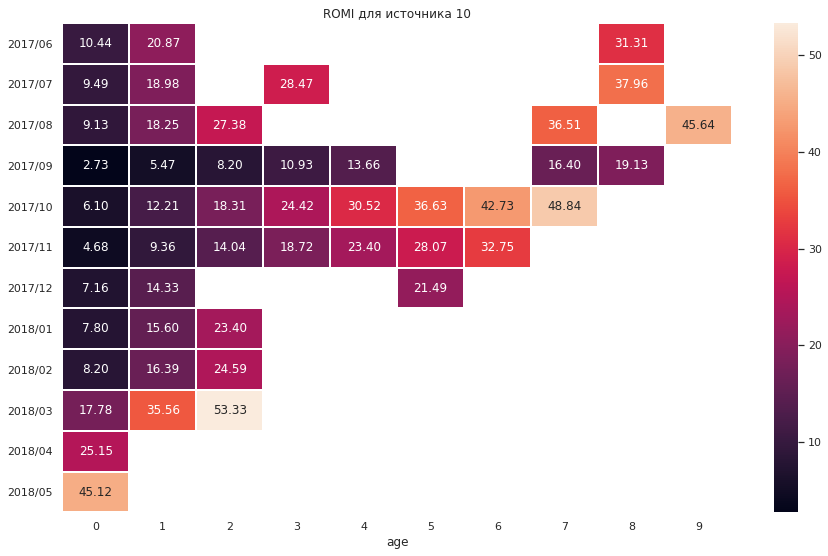

In [49]:
for source_id in rezult_ROMI['source_id'].unique():
    sns.set(style = 'white')
    plt.figure(figsize = (15, 9))
    plt.title('ROMI для источника ' + str(source_id))
    temp = rezult_ROMI.query('source_id == @source_id').pivot_table(index = 'first_orders_month', columns = 'age', values = 'ROMI', aggfunc = 'mean').cumsum(axis = 1)
    temp.index = temp.index.strftime("%Y/%m")
    sns.heatmap(temp, annot = True, fmt = '.2f', linewidths = 1)
    

Судя по тепловой карте можно сделать следующие выводы: везде ROMI меньше 100%, т. е. маркетинговые компании убыточные. Наиболее перспективные источники, который максильно приблизился к окупаемости, по сравнению с другими - это 4-й и 5-й источник.

## Выводы к шагу 2.3. Маркетинговые метрики

Всего потрачено на маркетинг: 329131.62 у.е.

Судя по графику расходов на 6, 7 и 8 источников вообще не было, можно предположить что это были бесплатные источники. Самым "дорогим", т. е. тем, на который потрачено больше всего денег - является 3 источник, самыми лешёвыми (не считая бесплатных) являются источники 9 и 10.

Судя по графику расходов на рекламные источники по месяцам, наибольшие вложения в маркетинг были в конце ноября, как раз перед новогодними праздниками. Меньше всего вложений в "тёплое" время года, как я понимаю - это не сезон для данного бизнеса, поэтому и особо не вкладывались.

Средний CAC для одного пользователя: 9.32

Если я всё правильно понял, CAC выше LTV, т. е. привлечение одного клиента обходится дорого, на данный момент бизнес убыточный.

Судя по графику, видно, что большая цена привлечения клиентов у 3-его источника, 9 и 10 - наоборот стоимость привлечения клиента маленькая, что соответствует графику расходов на рекламный источник.

Судя по тепловой карте можно сделать следующие выводы: везде ROMI меньше 100%, т. е. маркетинговые компании убыточные. Наиболее перспективные источники, который максильно приблизился к окупаемости, по сравнению с другими - это 4-й и 5-й источник.

# Шаг 3. Выводы и рекомендации

**3.1. Определите источники трафика, на которые маркетологам стоит делать упор. Объясните свой выбор: на какие метрики вы ориентируетесь и почему;**

Если я всё правильно понял - то на данный момент маркетинговые компании убыточные, но в целом, из того что имеется наиболее перспективным является 4-й и 5-й источник, хуже всех - 9-й источник (суде по ROMI)

**3.2. Опишите выводы, которые вы сделали после подсчёта метрик каждого вида: маркетинговых, продуктовых и метрик электронной коммерции;**

Исходя из графиков DAU, WAU, MAU видно, что наибольшая активность сайта приходится на конец ноября 2017 года. Также видно что в конце марта 2018 года посещений не было, скорее всего сайт был недоступен в этот момент. Также могу предположить о сезонность, т. е. сайт пользуется большей популярностью в холодное время, тогда как летом визитов меньше.

Среднее значение DAU: 907.99
Среднее значение WAU: 5716.25
Среднее значение MAU: 23228.42
Среднее количество сессий: 1.08

Как видно из графика среднего числа посещений сайта за день и расчётов cреднее количество сессий: 1.08, т. е. в основном на пользователя приходится одна сессия, что вполне логично. Опять же виден всплекс в поябре и падение в марте, как и на прошлом графике.

Средняя продолжительность сессии: 60 сек.

Показатели Retention Rate в целом не высокие, т. к. сайт не рассчитан на частое появление пользователей. В целом явного роста и падения Retention Rate также не наблюдается.

Средний Retention Rate на второй месяц жизни: 13.24%

В среднем с момента первого посещения сайта до совершения покупки проходит:  0 дней

Среднее колличество покупок за 6 месяев на одного пользователя: 3.00

Средний чек: 5.00 у.е.

Судя по графику о среднем чеке можно сделать вывод о распределении среднего чека в зависимости от даты. Предположу, что всплеки связаны с праздниками, например в декабре перед Новым Годом, а также в феврале перед 14 февраля и 8-м марта.

Суде по тепловой карте LTV невысокий, т. е. один клиент, в среднем приносит мало денег.

Средний LTV за 6 месяцев: 7.97

Всего потрачено на маркетинг: 329131.62 у.е.

Судя по графику расходов на 6, 7 и 8 источников вообще не было, можно предположить что это были бесплатные источники. Самым "дорогим", т. е. тем, на который потрачено больше всего денег - является 3 источник, самыми лешёвыми (не считая бесплатных) являются источники 9 и 10.

Судя по графику расходов на рекламные источники по месяцам, наибольшие вложения в маркетинг были в конце ноября, как раз перед новогодними праздниками. Меньше всего вложений в "тёплое" время года, как я понимаю - это не сезон для данного бизнеса, поэтому и особо не вкладывались.

Средний CAC для одного пользователя: 9.32

Если я всё правильно понял, CAC выше LTV, т. е. привлечение одного клиента обходится дорого, на данный момент бизнес убыточный.

Судя по графику, видно, что большая цена привлечения клиентов у 3-его источника, 9 и 10 - наоборот стоимость привлечения клиента маленькая, что соответствует графику расходов на рекламный источник.

Судя по тепловой карте можно сделать следующие выводы: везде ROMI меньше 100%, т. е. маркетинговые компании убыточные. Наиболее перспективные источники, который максильно приблизился к окупаемости, по сравнению с другими - это 4-й и 5-й источник.

**3.3. Подведите итоги когортного анализа. Определите самые перспективные для компании когорты клиентов;**
Обобщая полученные данные, на мой взгляд наиболее перспективные когорты лежат на отрезке ноябрь 2017 - март 2018. Из них самой перспективной является когорта декабрь 2017 и март 2018 года.